# 1 Import Packages

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import tensorflow as tf
import shap

# 2 Load Data

In [2]:
input_data = xr.load_dataarray("../data/input_data_2.nc")
output_data = xr.load_dataarray("../data/output_data_2.nc")

# 3 Load Model

In [3]:
model = tf.keras.models.load_model("../data/model_2")

2021-09-23 11:54:15.585570: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-23 11:54:15.586408: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-23 11:54:15.586858: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# 4 Interpretation

In [4]:
input_data = input_data.stack(feature=("lat","lon"))

In [5]:
n_feature = input_data.sizes["feature"]

In [6]:
model.predict(np.zeros([1,n_feature]))

2021-09-23 11:54:27.812082: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-23 11:54:27.833100: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


array([[18.111576]], dtype=float32)

In [7]:
background = input_data.isel(sample = np.random.randint(0,9*10**3,1000))

In [8]:
shap_explainer = shap.DeepExplainer(model, background.values)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.


In [9]:
shap_selection = input_data.isel(sample=np.random.randint(9*10**3,10**4,10))

In [10]:
shap_values = shap_explainer.shap_values(shap_selection.values)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [11]:
shap_values_xr = xr.DataArray(shap_values[0], dims = ["sample","feature"], coords = {"sample":shap_selection.coords["sample"],"feature":shap_selection.coords["feature"]} )

In [12]:
shap_values_xr_norm = shap_values_xr/np.abs(shap_values_xr).max(dim=("feature"))

In [13]:
output_data_sel_norm = output_data_sel/np.abs(output_data_sel).max(dim=("lat","lon"))

NameError: name 'output_data_sel' is not defined

[[1.         0.65487586]
 [0.65487586 1.        ]]
[[1.         0.59109373]
 [0.59109373 1.        ]]
[[1.         0.57517254]
 [0.57517254 1.        ]]
[[1.         0.60177559]
 [0.60177559 1.        ]]
[[1.         0.60620665]
 [0.60620665 1.        ]]
[[1.         0.62210418]
 [0.62210418 1.        ]]
[[1.         0.60972131]
 [0.60972131 1.        ]]
[[1.         0.58268543]
 [0.58268543 1.        ]]
[[1.         0.60421746]
 [0.60421746 1.        ]]
[[1.         0.61897893]
 [0.61897893 1.        ]]


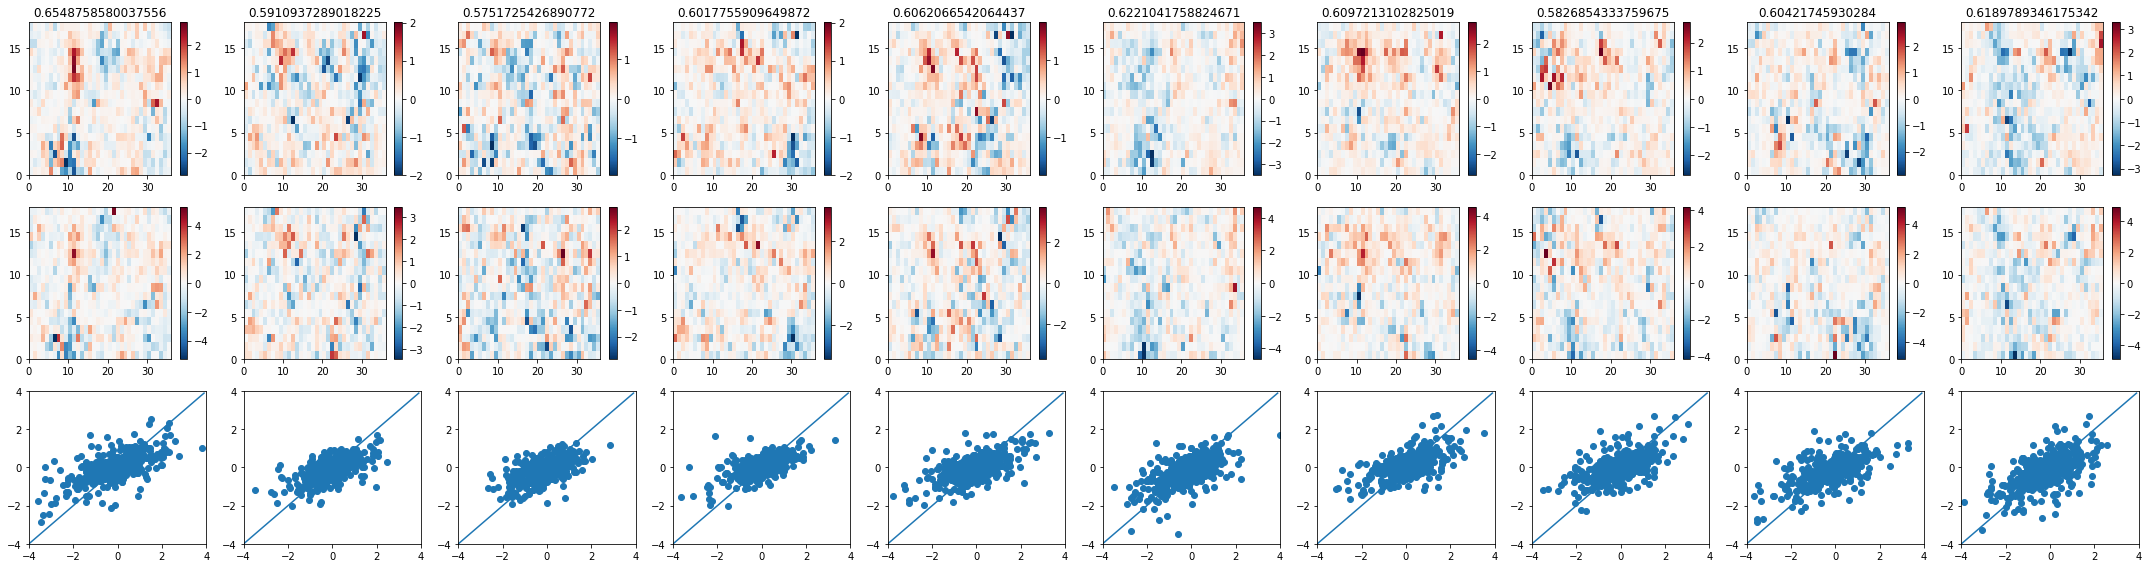

In [14]:
fig,ax = plt.subplots(3,10, figsize=(30,8))

output_data_sel = output_data.sel(sample=shap_selection.sample)

for sample_index in range(10):
    tmp = shap_values_xr.unstack(dim="feature").isel(sample=sample_index)
    maximum = np.abs(tmp).max()
    plot = ax[0,sample_index].pcolormesh(tmp, vmin=-maximum, vmax = maximum, cmap="RdBu_r")
    plt.colorbar(plot, ax = ax[0,sample_index])
    corr = np.corrcoef( output_data_sel.isel(sample=sample_index).values.flatten(),shap_values_xr.unstack(dim="feature").isel(sample=sample_index).values.flatten())
    ax[0,sample_index].set_title(str(corr[0,1]))
    print(corr)


for sample_index in range(10):
    tmp = output_data_sel.isel(sample=sample_index)
    maximum = np.abs(tmp).max()
    plot = ax[1,sample_index].pcolormesh(tmp, vmin=-maximum, vmax = maximum, cmap="RdBu_r")
    plt.colorbar(plot, ax = ax[1,sample_index])

for sample_index in range(10):
    ax[2,sample_index].scatter(output_data_sel.isel(sample=sample_index).values.flatten(), shap_values_xr.isel(sample=sample_index).values.flatten())
    ax[2,sample_index].set_xlim(-4,4)
    ax[2,sample_index].set_ylim(-4,4)
    x =np.arange(-4,4,0.1)
    ax[2,sample_index].plot(x,x)
plt.tight_layout()

[[1.         0.62791436]
 [0.62791436 1.        ]]
[[1.         0.61117056]
 [0.61117056 1.        ]]
[[1.         0.63375455]
 [0.63375455 1.        ]]
[[1.         0.64723309]
 [0.64723309 1.        ]]
[[1.         0.64429306]
 [0.64429306 1.        ]]
[[1.         0.63166408]
 [0.63166408 1.        ]]
[[1.         0.60103791]
 [0.60103791 1.        ]]
[[1.         0.62408754]
 [0.62408754 1.        ]]
[[1.         0.57588233]
 [0.57588233 1.        ]]
[[1.         0.58819607]
 [0.58819607 1.        ]]


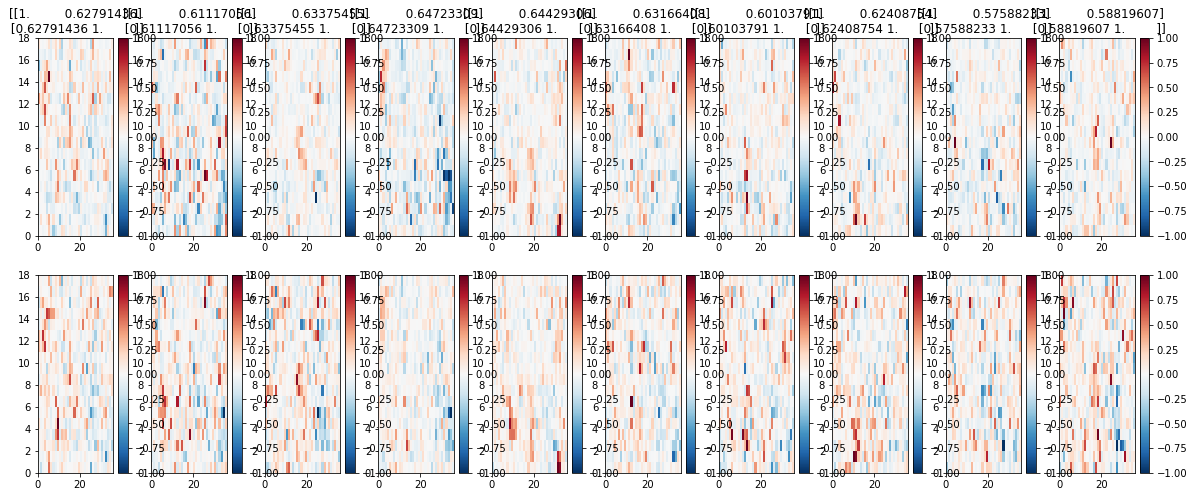

In [105]:
fig,ax = plt.subplots(2,10, figsize=(20,8))

output_data_sel = output_data.sel(sample=shap_selection.sample)

for sample_index in range(10):
    tmp = shap_values_xr_norm.unstack(dim="feature").isel(sample=sample_index)
    maximum = np.abs(tmp).max()
    plot = ax[0,sample_index].pcolormesh(tmp, vmin=-maximum, vmax = maximum, cmap="RdBu_r")
    plt.colorbar(plot, ax = ax[0,sample_index])
    corr = np.corrcoef( output_data_sel.isel(sample=sample_index).values.flatten(),shap_values_xr.unstack(dim="feature").isel(sample=sample_index).values.flatten())
    ax[0,sample_index].set_title(str(corr))
    print(corr)


for sample_index in range(10):
    tmp = output_data_sel_norm.isel(sample=sample_index)
    maximum = np.abs(tmp).max()
    plot = ax[1,sample_index].pcolormesh(tmp, vmin=-maximum, vmax = maximum, cmap="RdBu_r")
    plt.colorbar(plot, ax = ax[1,sample_index])


In [84]:
np.corrcoef(output_data_sel.isel(sample=sample_index).values.flatten(),shap_values_xr.unstack(dim="feature").isel(sample=sample_index).values.flatten())

array([[1.        , 0.58819607],
       [0.58819607, 1.        ]])

In [54]:
shap.image_plot(shap_values)

AttributeError: 'NoneType' object has no attribute 'shape'

shap.DeepExplainer(model,)